
Descriptive Statistics: 
          Customer_Age  Dependent_count  Months_Inactive_12_mon  Credit_Limit  \
mean         46.325960         2.346203                2.341167   8631.953698   
std           8.016814         1.298908                1.010622   9088.776650   
median       46.000000         2.000000                2.000000   4549.000000   
skewness     -0.033605        -0.020826                0.633061      1.666726   
kurtosis     -0.288620        -0.683017                1.098523      1.808989   

          Total_Revolving_Bal  Total_Trans_Amt  Avg_Utilization_Ratio  
mean              1162.814061      4404.086304               0.274894  
std                814.987335      3397.129254               0.275691  
median            1276.000000      3899.000000               0.176000  
skewness            -0.148837         2.041003               0.718008  
kurtosis            -1.145992         3.894023              -0.794972  

Correlation Matrix: 
                        Customer_

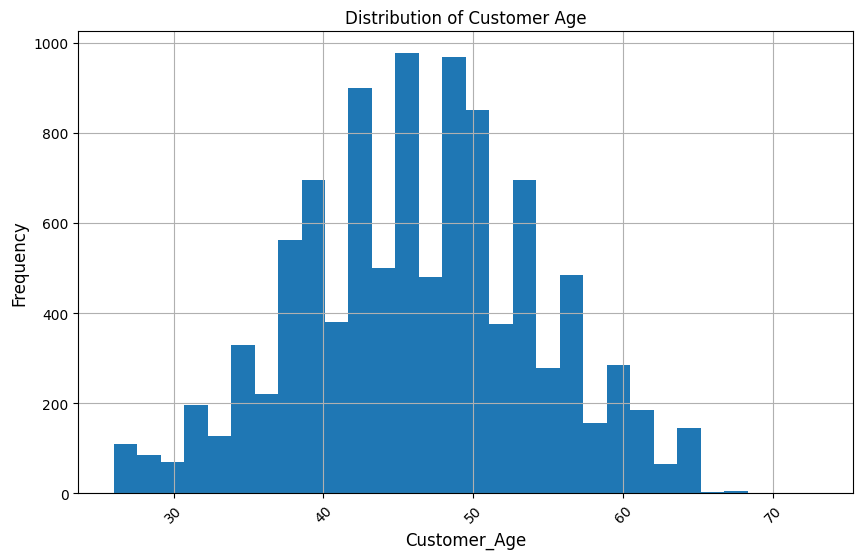

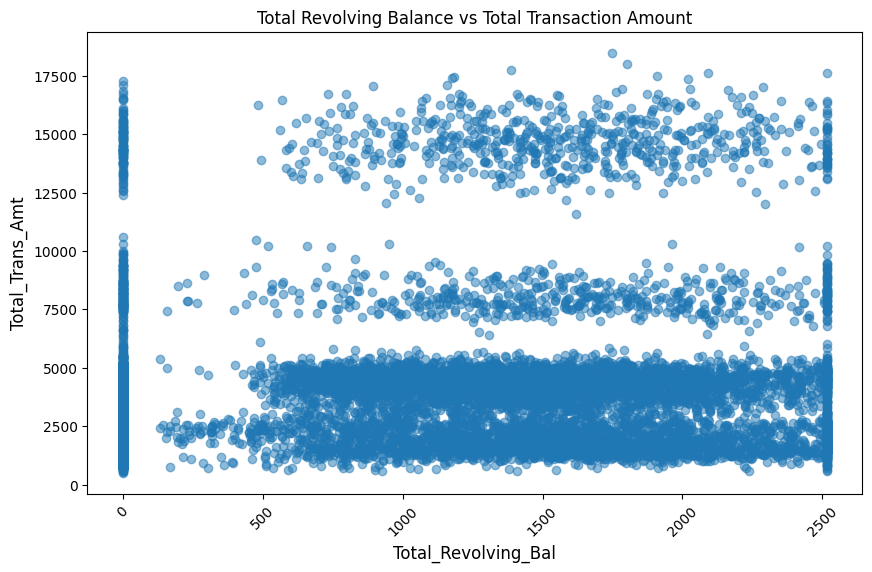

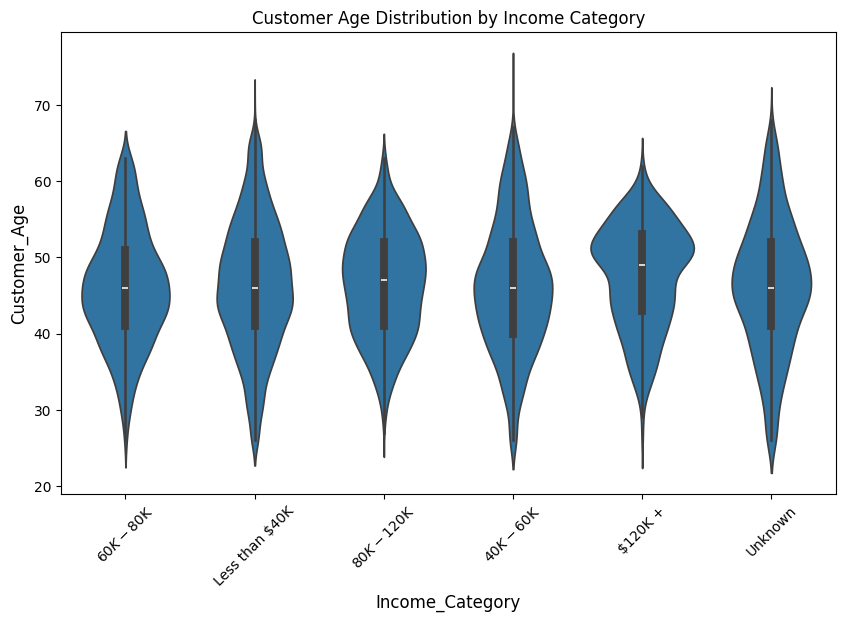

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
file_path_new = 'BankChurners.csv'
df = pd.read_csv(file_path_new)

# Select important columns for analysis
columns_of_interest = [
    'Customer_Age', 'Dependent_count', 'Months_Inactive_12_mon', 
    'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 
    'Avg_Utilization_Ratio'
]
df_subset = df[columns_of_interest]

# Calculate and display the desired statistics for the selected columns
def display_statistics(data):
    """
    Calculates and displays mean, median, skewness, kurtosis, and standard deviation for the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    """
    statistics = data.describe().loc[['mean', 'std']]
    statistics.loc['median'] = data.median()
    statistics.loc['skewness'] = data.skew()
    statistics.loc['kurtosis'] = data.kurtosis()
    return statistics

# Function to create a histogram
def plot_histogram(data, column, title):
    """
    Plots a histogram for a specified column in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    column (str): The column name for which to plot the histogram.
    title (str): The title of the histogram.
    """
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=30)
    plt.title(title)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Function to create a scatter plot
def plot_scatter(data, x_column, y_column, title):
    """
    Plots a scatter plot for specified x and y columns in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    title (str): The title of the scatter plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Function to create a violin plot
def plot_violin(data, x_column, y_column, title):
    """
    Plots a violin plot for a specified x and y column in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    title (str): The title of the violin plot.
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Display the desired statistics
statistics = display_statistics(df_subset)
print("\nDescriptive Statistics: ")

print(statistics)

# Compute the correlation matrix
def compute_correlation(data):
    """
    Computes and returns the correlation matrix of the dataframe.
    Only numeric columns are considered.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    
    Returns:
    pd.DataFrame: The correlation matrix.
    """
    numeric_data = data.select_dtypes(include=[float, int])
    return numeric_data.corr()

correlation_matrix = compute_correlation(df_subset)
print("\nCorrelation Matrix: ")
print(correlation_matrix)

# Histogram for Customer Age
plot_histogram(df_subset, 'Customer_Age', 'Distribution of Customer Age')

# Scatter plot for Total Revolving Balance vs Total Transaction Amount
plot_scatter(df_subset, 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total Revolving Balance vs Total Transaction Amount')

# Violin plot for Customer Age vs Income Category
plot_violin(df, 'Income_Category', 'Customer_Age', 'Customer Age Distribution by Income Category')
